In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read CSV File

In [106]:
data = pd.read_csv('Heart Disease data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [107]:
data.shape    ## Check the number of rows and columns

(1025, 14)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [109]:
data.isnull().sum()    ## Check if there is any sort of Null Value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [110]:
data.duplicated().sum(axis=0)     ## Check the duplicate values

723

### Drop the Duplicate Values

In [111]:
data.drop_duplicates(keep='first',inplace=True)

In [112]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [113]:
data.shape

(302, 14)

In [114]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [115]:
data.duplicated().sum()

0

### Gender wise Heart Disease

In [116]:
data['sex'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      0
      ..
723    0
733    0
739    1
843    1
878    1
Name: sex, Length: 302, dtype: int64>

In [117]:
Gender=data.groupby('sex')[['target']].sum()
Gender

,target
sex,
0,72
1,92


<Figure size 800x600 with 0 Axes>

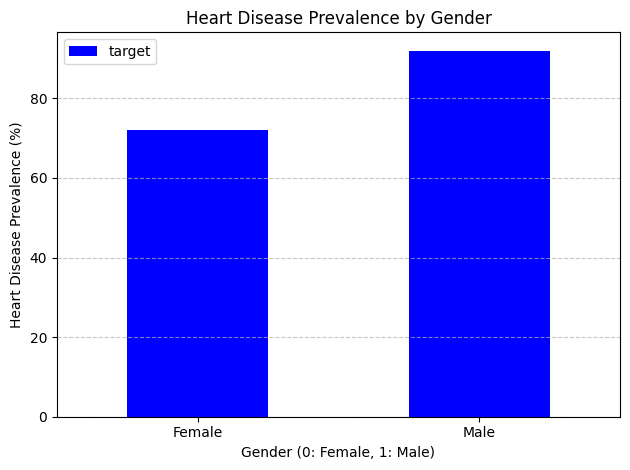

In [118]:
plt.figure(figsize=(8, 6))
Gender.plot(kind='bar', color=['blue', 'red'])
plt.title('Heart Disease Prevalence by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Heart Disease Prevalence (%)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Age wise Hear Attack

In [119]:
data['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [156]:
Age_heart= data.groupby('age')[['target']].count()
Age_heart

,target
age,
29,1
34,2
35,4
37,2
38,2
39,4
40,3
41,10
42,8


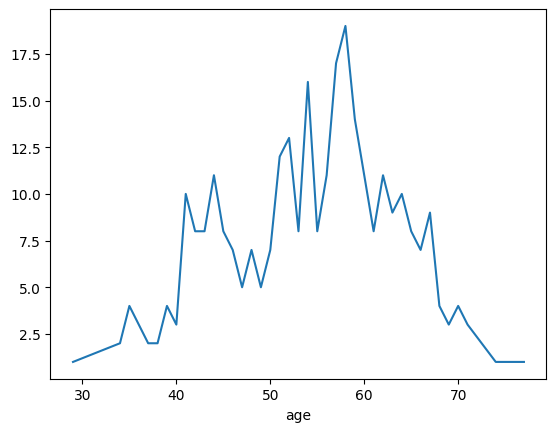

In [160]:
data.groupby('age').target.count().plot()
plt.show()

In [166]:
data.groupby('age').target.count()

age
29     1
34     2
35     4
37     2
38     2
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: target, dtype: int64

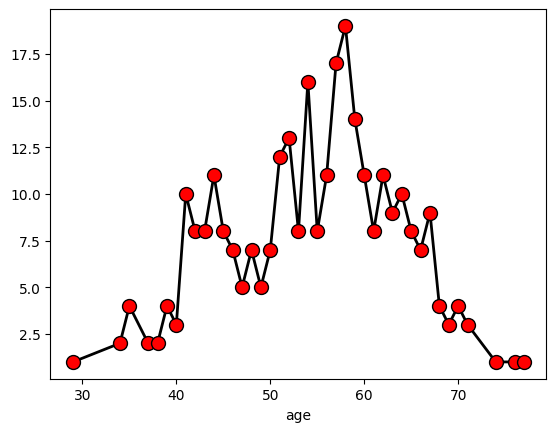

In [174]:
data.groupby('age').target.count().plot(linewidth=2,color='k',linestyle='solid',marker='o',markerfacecolor='red',markersize=10)
plt.show()

### Chest Pain level

In [122]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [123]:
data.groupby('cp')[['target']].count()

,target
cp,
0,143
1,50
2,86
3,23


### Age and Gender wise Heart Disease

In [124]:
data.groupby(['age','sex'])[['target']].count()

target
age sex        
29  1         1
34  0         1
    1         1
35  0         1
    1         3
...         ...
70  1         4
71  0         3
74  0         1
76  0         1
77  1         1

[73 rows x 1 columns]

### Blood Pressure and Cholesterol Levels

In [125]:
data.groupby(['trestbps','chol','sex'])[['target']].count()

target
trestbps chol sex        
94       199  0         1
         227  1         1
100      222  1         1
         234  1         1
         248  0         1
...                   ...
180      274  1         1
         325  0         1
         327  0         1
192      283  1         1
200      288  0         1

[293 rows x 1 columns]

### Exercise Induced Angina

In [126]:
data.groupby(['exang','sex']).target.count()

exang  sex
0      0       74
       1      129
1      0       22
       1       77
Name: target, dtype: int64

In [127]:
data.shape

(302, 14)

### ST Depression

In [135]:
data.groupby(['oldpeak']).target.count()

oldpeak
0.0    98
0.1     7
0.2    12
0.3     3
0.4     9
0.5     5
0.6    14
0.7     1
0.8    13
0.9     3
1.0    14
1.1     2
1.2    17
1.3     1
1.4    13
1.5     5
1.6    11
1.8    10
1.9     5
2.0     9
2.1     1
2.2     4
2.3     2
2.4     3
2.5     2
2.6     6
2.8     6
2.9     1
3.0     5
3.1     1
3.2     2
3.4     3
3.5     1
3.6     4
3.8     1
4.0     3
4.2     2
4.4     1
5.6     1
6.2     1
Name: target, dtype: int64

### Thalassemia and Heart Disease: 

In [143]:
data.groupby(['thal']).target.count()

thal
0      2
1     18
2    165
3    117
Name: target, dtype: int64

In [144]:
data.groupby(['thal','sex']).target.count()

thal  sex
0     0        1
      1        1
1     0        1
      1       17
2     0       79
      1       86
3     0       15
      1      102
Name: target, dtype: int64

# Machine Learning

### Classification

In [189]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [190]:
data.shape

(302, 14)

In [191]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [192]:
X=data.iloc[:,:-1].values
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [52.,  1.,  0., ...,  2.,  1.,  3.],
       [59.,  1.,  3., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [193]:
y=data.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [195]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [196]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [197]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [198]:
classifier.score(X_test,y_test)*100

81.57894736842105

In [199]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[24, 10],
       [ 4, 38]], dtype=int64)

### K-NN

In [200]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski")
classifier.fit(X_train,y_train)`

KNeighborsClassifier()

In [201]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [202]:
classifier.score(X_test,y_test)*100

77.63157894736842

In [203]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

77.63157894736842

In [204]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[23, 11],
       [ 6, 36]], dtype=int64)

### SVC

In [205]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)

SVC()

In [206]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [207]:
classifier.score(X_test,y_test)*100

78.94736842105263

In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

78.94736842105263

In [209]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[23, 11],
       [ 5, 37]], dtype=int64)

### Naive Bayes Classification

In [210]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [211]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [212]:
classifier.score(X_test,y_test)*100

78.94736842105263

In [213]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

78.94736842105263

In [214]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[26,  8],
       [ 8, 34]], dtype=int64)

### DTC

In [215]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [216]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [217]:
classifier.score(X_test,y_test)*100

71.05263157894737

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

71.05263157894737

In [219]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[24, 10],
       [12, 30]], dtype=int64)

### RFC

In [220]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [221]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [222]:
classifier.score(X_test,y_test)*100

77.63157894736842

In [223]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

77.63157894736842

In [224]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[23, 11],
       [ 6, 36]], dtype=int64)